# Matplotlib for Statistical Visualization

**Matplotlib** is the foundation of data visualization in Python. While libraries like Pandas and Seaborn are built on top of it, understanding Matplotlib is essential for customizing charts for reports and analysis.

**Key Concepts:**
1.  **Figure:** The entire window or page that everything is drawn on.
2.  **Axes:** The specific plot or graph (contains the x-axis and y-axis).

In this notebook, we will cover:
* Line Plots (Trends)
* Scatter Plots (Relationships & Correlation)
* Histograms (Frequency Distributions)
* Box Plots (Five-Number Summary & Outliers)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


# This line is sometimes needed in older Jupyter versions to see plots inline
%matplotlib inline

print("Setup Complete.")


Setup Complete.


## 1. Line Plots

Line plots are used to show trends over time.

* `plt.plot(x, y)`: Plots x versus y.
* `plt.title()`, `plt.xlabel()`, `plt.ylabel()`: Add labels to make the graph understandable.

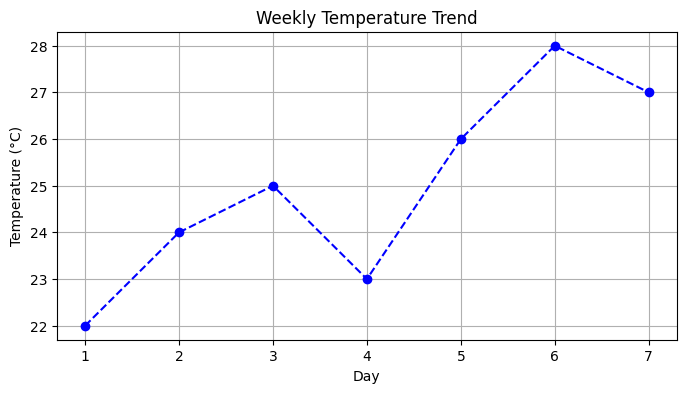

In [2]:
days = np.array([1, 2, 3, 4, 5, 6, 7])
temperature = np.array([22, 24, 25, 23, 26, 28, 27])

plt.figure(figsize=(8, 4)) 
plt.plot(days, temperature, color='blue', marker='o', linestyle='--')

plt.title("Weekly Temperature Trend")
plt.xlabel("Day")
plt.ylabel("Temperature (°C)")
plt.grid(True) 

plt.show()

## 2. Scatter Plots

In statistics, scatter plots are crucial for checking **correlation** between two continuous variables.

* **Positive Correlation:** Points move upwards from left to right.
* **No Correlation:** Points are scattered randomly.

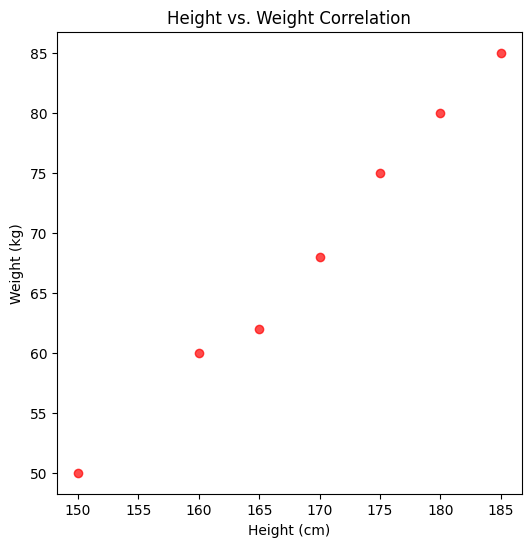

In [3]:
height = np.array([150, 160, 165, 170, 175, 180, 185])
weight = np.array([50, 60, 62, 68, 75, 80, 85])

plt.figure(figsize=(6, 6))
plt.scatter(height, weight, color='red', alpha=0.7) # Alpha controls transparency

plt.title("Height vs. Weight Correlation")
plt.xlabel("Height (cm)")
plt.ylabel("Weight (kg)")

plt.show()

## 3. Histograms

Histograms allow us to see the **distribution** of data. They help answer questions like:
* Is the data normally distributed (bell curve)?
* Is the data skewed to the left or right?

* `bins`: The number of buckets to divide the data into.

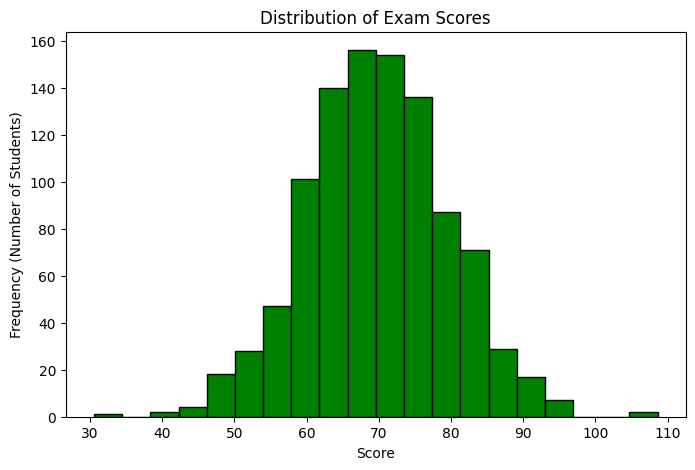

In [4]:

scores = np.random.normal(70, 10, 1000)

plt.figure(figsize=(8, 5))
plt.hist(scores, bins=20, color='green', edgecolor='black')

plt.title("Distribution of Exam Scores")
plt.xlabel("Score")
plt.ylabel("Frequency (Number of Students)")

plt.show()

## 4. Box Plots

The Box Plot is the standard way to visualize the **Five-Number Summary**:
1.  Minimum
2.  First Quartile (Q1 - 25th percentile)
3.  Median (Q2 - 50th percentile)
4.  Third Quartile (Q3 - 75th percentile)
5.  Maximum

**Key Feature:** Dots outside the "whiskers" represent **Outliers**.

/var/folders/h0/vw0vdnqn7csfsvsh8_x35hkr0000gn/T/ipykernel_59175/1656778650.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_to_plot, labels=['Group A', 'Group B'])


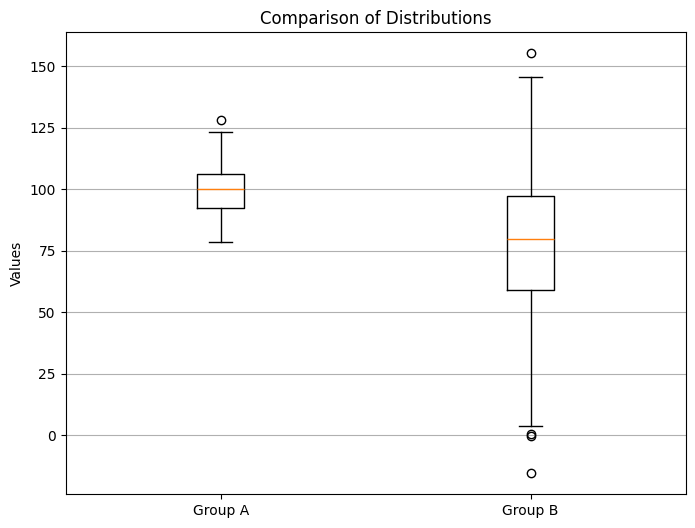

In [5]:
data_group_A = np.random.normal(100, 10, 200)
data_group_B = np.random.normal(80, 30, 200) 

data_to_plot = [data_group_A, data_group_B]

plt.figure(figsize=(8, 6))
plt.boxplot(data_to_plot, labels=['Group A', 'Group B'])

plt.title("Comparison of Distributions")
plt.ylabel("Values")
plt.grid(axis='y') 

plt.show()

## 5. 3D Plotting (Advanced)

Sometimes, two dimensions aren't enough. If we want to see the relationship between **three variables** simultaneously, we use 3D plots.

To do this, we need to pass `projection='3d'` to the axes.

**Common 3D Plots:**
1.  **3D Scatter:** For seeing clusters in 3-variable data.
2.  **3D Surface:** For visualizing mathematical functions or "landscapes" (like optimization cost functions).

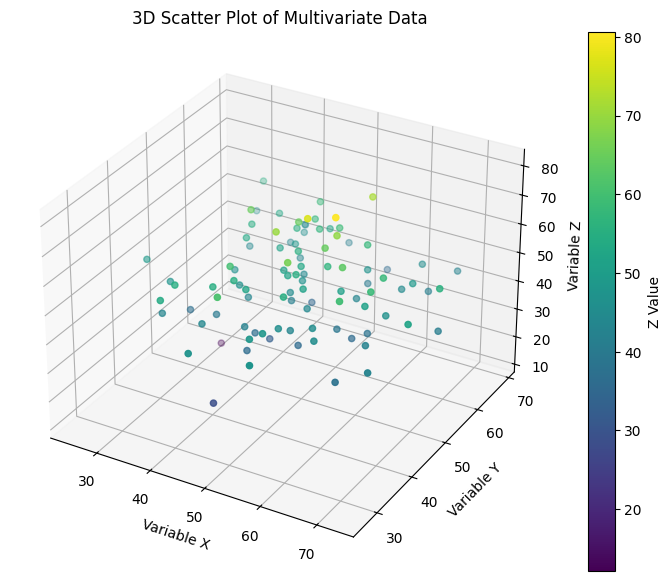

In [6]:
from mpl_toolkits.mplot3d import Axes3D

x = np.random.normal(50, 10, 100)  # Variable A
y = np.random.normal(50, 10, 100)  # Variable B
z = np.random.normal(50, 10, 100)  # Variable C

fig = plt.figure(figsize=(10, 7))

ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(x, y, z, c=z, cmap='viridis', marker='o')

ax.set_xlabel('Variable X')
ax.set_ylabel('Variable Y')
ax.set_zlabel('Variable Z')
ax.set_title("3D Scatter Plot of Multivariate Data")

plt.colorbar(scatter, label='Z Value')

plt.show()

## 9. Visualizing Gradient Descent in 3D

In statistics and machine learning, we often try to find the "best" parameters for a model. "Best" usually means the parameters that minimize the error (or "Cost Function").

**Gradient Descent** is an optimization algorithm used to find this minimum value. Think of it as standing on top of a hilly terrain (the cost surface) and taking steps downhill in the steepest direction until you reach the lowest valley (minimum error).

In this visualization:
1.  **The Surface:** Represents the Cost Function (like Mean Squared Error). Higher areas mean higher error.
2.  **The Red Path:** Represents the steps the algorithm takes, starting from a random point with high error, moving towards the minimum.

We will use a simple 3D parabola function: $Z = X^2 + Y^2$. The minimum is clearly at $(0,0,0)$.

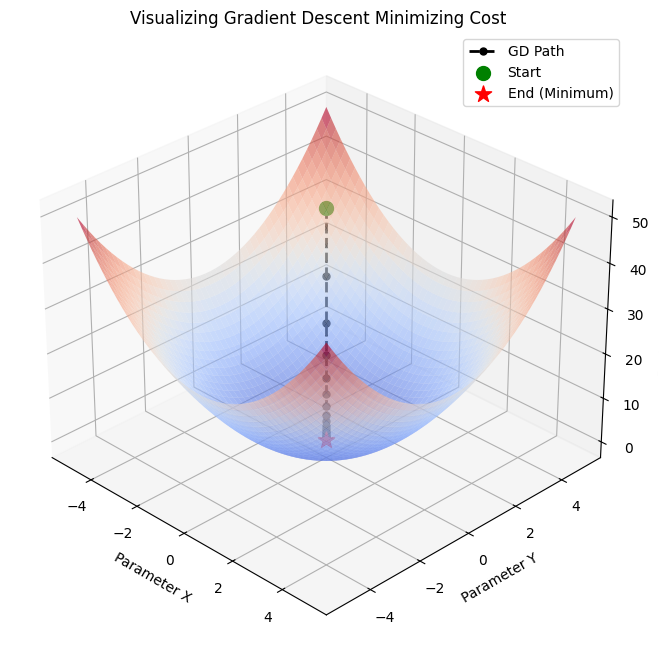

In [7]:
from mpl_toolkits.mplot3d import Axes3D

x_grid = np.linspace(-5, 5, 50)
y_grid = np.linspace(-5, 5, 50)
X_surf, Y_surf = np.meshgrid(x_grid, y_grid)

Z_surf = X_surf**2 + Y_surf**2


current_x = -4.0
current_y = 4.0
learning_rate = 0.1 
iterations = 20 

history_x = []
history_y = []
history_z = []

for i in range(iterations):
    current_z = current_x**2 + current_y**2

    history_x.append(current_x)
    history_y.append(current_y)
    history_z.append(current_z)


    grad_x = 2 * current_x
    grad_y = 2 * current_y

    current_x = current_x - (learning_rate * grad_x)
    current_y = current_y - (learning_rate * grad_y)


fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')


surf = ax.plot_surface(X_surf, Y_surf, Z_surf, cmap='coolwarm', alpha=0.6, edgecolor='none')

ax.plot(history_x, history_y, history_z, color='black', marker='o', linestyle='dashed', linewidth=2, markersize=5, label='GD Path')

ax.scatter(history_x[0], history_y[0], history_z[0], color='green', s=100, label='Start')
ax.scatter(history_x[-1], history_y[-1], history_z[-1], color='red', s=150, marker='*', label='End (Minimum)')

ax.set_title("Visualizing Gradient Descent Minimizing Cost")
ax.set_xlabel('Parameter X')
ax.set_ylabel('Parameter Y')
ax.set_zlabel('Cost Z (Error)')
ax.legend()

ax.view_init(elev=30, azim=-45)

plt.show()

## 5. Appendix: Customization Reference

You often need to customize plots to distinguish different data points. Here is a reference list.

### **A. Common Colors (`color=`)**
| Code | Color |
| :--- | :--- |
| `'b'` | Blue |
| `'g'` | Green |
| `'r'` | Red |
| `'c'` | Cyan |
| `'m'` | Magenta |
| `'y'` | Yellow |
| `'k'` | Black |
| `'w'` | White |

### **B. Markers (`marker=`)**
| Code | Description |
| :--- | :--- |
| `'.'` | Point |
| `'o'` | Circle |
| `'v'` | Triangle Down |
| `'^'` | Triangle Up |
| `'s'` | Square |
| `'*'` | Star |
| `'x'` | X marker |

### **C. Line Styles (`linestyle=`)**
| Code | Description |
| :--- | :--- |
| `'-'` | Solid line (default) |
| `'--'` | Dashed line |
| `'-.'` | Dash-dot line |
| `':'` | Dotted line |

### **D. Useful Helper Functions**
| Function | Description |
| :--- | :--- |
| `plt.legend(['Label1', 'Label2'])` | Adds a legend box to the plot. |
| `plt.grid(True)` | Turns on grid lines. |
| `plt.xlim(min, max)` | Limits the view of the X-axis. |
| `plt.ylim(min, max)` | Limits the view of the Y-axis. |
| `plt.axvline(x, color='r')` | Draws a vertical line at position `x`. |
| `plt.axhline(y, color='r')` | Draws a horizontal line at position `y`. |
| `plt.savefig('name.png')` | Saves the plot as an image file. |

## 6. Exercises

### **Exercise 1: Basic Scatter Plot**

1.  Create two arrays:
    * `study_hours = [1, 2, 3, 4, 5, 6, 7, 8]`
    * `test_scores = [60, 65, 70, 75, 80, 85, 90, 95]`
2.  Create a **Scatter Plot** of `study_hours` vs `test_scores`.
3.  Make the points **Red** (`'r'`) and use a **Star** marker (`'*'`).
4.  Add a title "Study Time vs Scores".

### **Exercise 2: Advanced Histogram**

**Scenario:** You are analyzing the prices of houses in a neighborhood. You want to see the distribution and highlight the average price.

**Tasks:**
1.  Run the code provided below to generate the `house_prices` data.
2.  Create a **Histogram** of the data with `bins=30` and color `'skyblue'`.
3.  Calculate the **mean (average)** of the `house_prices` using `np.mean()`.
4.  **The Challenge:** Add a **vertical red dashed line** to the plot at the mean value.
    * *Hint: Look at Section D in the Appendix for a function that draws vertical lines.*
5.  Add a label/legend indicating what the red line represents.